In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam


In [2]:
from sklearn.datasets import make_moons

In [3]:
from mlxtend.plotting import plot_decision_regions
X,y=make_moons(n_samples=100,noise=0.25,random_state=1)

In [4]:
X.shape

(100, 2)

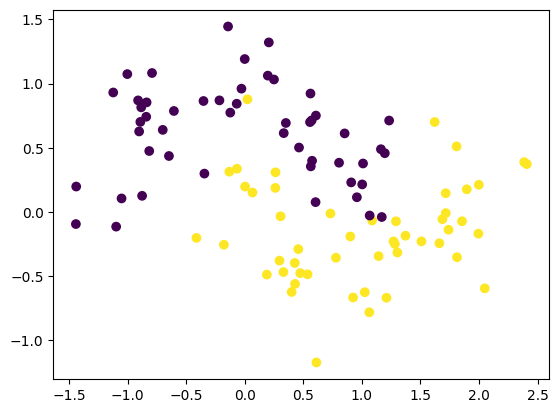

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)


In [6]:
model=Sequential()
model.add(Dense(128,input_shape=(2,),activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
adam=Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [9]:
history=model.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

In [10]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 900us/step


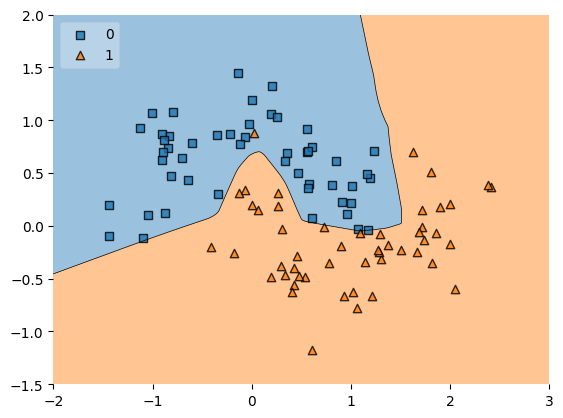

In [11]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

Text(0.5, 0, 'epoch')

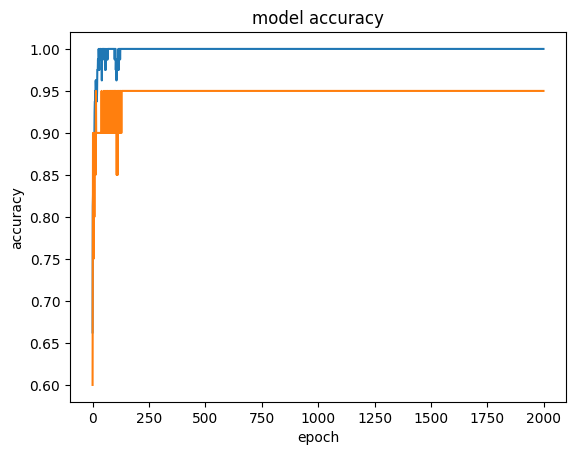

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

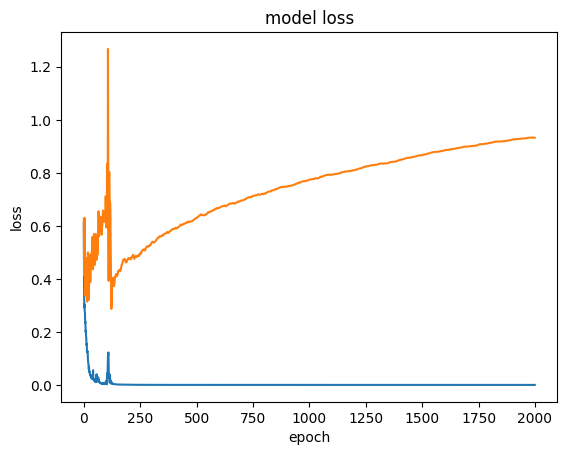

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')


In [14]:
model1=Sequential()
model1.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model1.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
adam=Adam(learning_rate=0.01)

model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history1=model.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 943us/step


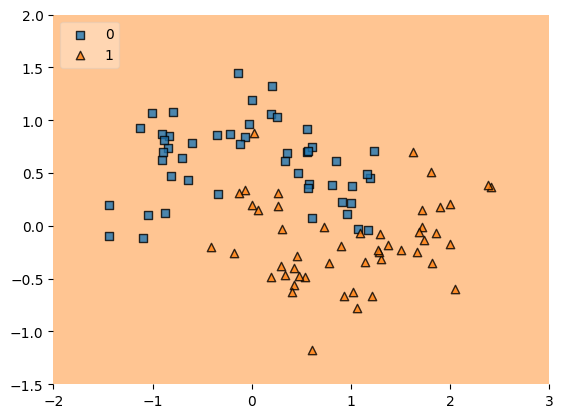

In [16]:
plot_decision_regions(X,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

Text(0.5, 0, 'epoch')

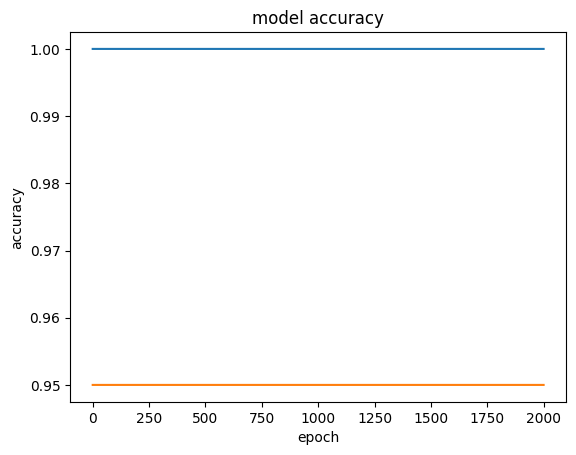

In [17]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

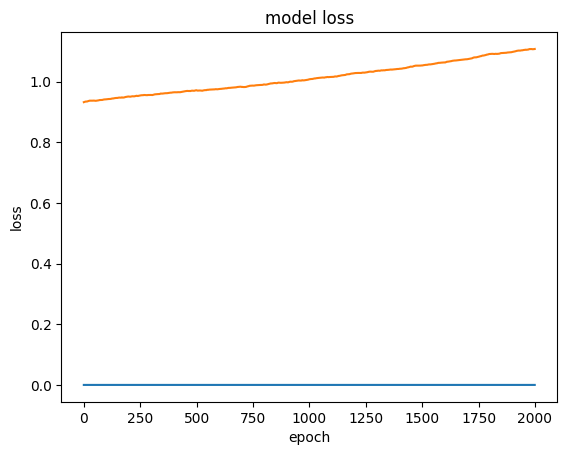

In [18]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')